In [41]:
from carbon import CarbonSimulatorUI, CarbonOrderUI, P, __version__, __date__
from math import sqrt
import numpy as np
from matplotlib import pyplot as plt
print(f"Carbon v{__version__} ({__date__})")
print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(CarbonSimulatorUI))
print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(CarbonOrderUI))

Carbon v2.2-BETA4 (09/Jan/2022)
CarbonSimulatorUI v2.3 (9/Jan/2023)
CarbonOrderUI v1.5.1 (07/Jan/2023)


# Marginal Price Routing Example (NBTest 44)

NBTEST: NOTEST_DEFAULT = TEST

The Marginal Price Routing code at the end of this notebook required a number of changes to the Carbon library. In the first few sections below we collect a number of test for those new items.

## CarbonPair related tests

In [42]:
pair = P("ETH/USDC")
assert isinstance(pair, P)
print(str(pair))
assert str(pair) == "P('ETH/USDC')"
pair2 = P.from_slashpair("  ETH / USDC")
print(pair2)
assert isinstance(pair2, P)
assert pair2.slashpair == "ETH/USDC"
pair3 = P(pair2)
assert isinstance(pair3, P)
assert pair3==pair2

P('ETH/USDC')
P('ETH/USDC')


## CarbonOrderUI general tests

In [43]:
order = CarbonOrderUI.from_prices("ETH/USDC", "ETH", 2000, 3000, 10, 10)
assert isinstance(order, CarbonOrderUI)
#print(round(order.B,10))
assert round(order.B,10) == 0.0182574186
#print(round(order.S,10))
assert round(order.S,10) == 0.0041032612
assert order.yint == 10
assert order.y == 10
assert order.pa == 2000
assert order.pb == 3000
assert order.p_marg == 2000
assert order.pa == order.py
assert order.pb == order.px
assert order.total_liquidity == (10, 'ETH')
assert round(order.p0, 10) == round(sqrt(2000*3000),10)
assert round(order.widthpc, 10) == round((3000-2000)/sqrt(2000*3000),10)
assert round(order.widthr, 10) == round(3000/2000,10)
order

CarbonOrderUI(pair=ETH/USDC, B=0.018257418583505537, S=0.004103261191492361, yint=10, y=10, id=None, linked=None)

In [44]:
try:
    CarbonOrderUI.from_prices("ETH/USDC", "ETH", 2000, 3000, 5, 10)
    raise RuntimeError("Should have raised exception")
except ValueError as e:
    print(e)

('y must not be bigger than yint (y={y}, yint={yint})', 5, 10)


In [45]:
try:
    CarbonOrderUI.from_prices("ETH/USDC", "ETH", 2000, 3000, -10, -10)
    raise RuntimeError("Should have raised exception")
except ValueError as e:
    print(e)

('yint must be non-negative', -10)


In [46]:
try:
    CarbonOrderUI.from_prices("ETH/USDC", "ETH", 2000, 3000, 10, -10)
    raise RuntimeError("Should have raised exception")
except ValueError as e:
    print(e)

('y must be non-negative', -10)


In [47]:
order = CarbonOrderUI.from_prices("ETH/USDC", "ETH", 3000, 2000, 10, 10)
assert order.pa == 2000
assert order.pb == 3000
order

[from_prices] exchanging pa, pb


CarbonOrderUI(pair=ETH/USDC, B=0.018257418583505537, S=0.004103261191492361, yint=10, y=10, id=None, linked=None)

In [48]:
orderr = CarbonOrderUI.from_prices("ETH/USDC", "USDC", 1000, 750, 10000, 10000)
assert orderr.pa == 1000
assert round(orderr.pb,6) == 750
orderr

CarbonOrderUI(pair=ETH/USDC, B=27.386127875258307, S=4.236648726425486, yint=10000, y=10000, id=None, linked=None)

In [49]:
assert order.p_marg_f(0) == order.p_marg
assert round(order.p_marg_f(5), 6) == 2424.492346
assert order.p_marg_f(10) == 3000

In [50]:
assert orderr.p_marg_f(0) == orderr.p_marg
assert round(orderr.p_marg_f(10000),8) == 750

In [51]:
assert order.p_marg_f(-1, raiseonerror=False) is None
assert order.p_marg_f(10.0001, raiseonerror=False) is None
assert order.p_marg_f(-1) is None
assert order.p_marg_f(10.0001) is None

In [52]:
assert orderr.p_marg_f(10001, raiseonerror=False) is None
assert orderr.p_marg_f(10001) is None

In [53]:
try:
    order.p_marg_f(-1, raiseonerror=True)
    raise RuntimeError("Should have raised exception")
except ValueError as e:
    print(e)
    assert str(e) == "('Trade size dy must be a non-negative number', -1)"

('Trade size dy must be a non-negative number', -1)


In [54]:
try:
    order.p_marg_f(10.001, raiseonerror=True)
    raise RuntimeError("Should have raised exception")
except ValueError as e:
    print(e)

('Trade size dy too big, results in y<0', 10.001, -0.0009999999999994458, 10)


In [55]:
try:
    order.p_marg_f(10001, raiseonerror=True)
    raise RuntimeError("Should have raised exception")
except ValueError as e:
    print(e)

('Trade size dy too big, results in y<0', 10001, -9991, 10)


## CarbonOrderUI tests yfromp

In [56]:
order = CarbonOrderUI.from_prices("ETH/USDC", "ETH", 2000, 3000, 10, 10)
order1 = CarbonOrderUI.from_prices("ETH/USDC", "ETH", 2000, 3000, 10, 5)
orderr = CarbonOrderUI.from_prices("ETH/USDC", "USDC", 1000, 750, 10000, 10000)

In [57]:
assert order.yfromp_f(2000) == 10
assert order.yfromp_f(3000) == 0
assert order.dyfromp_f(2000) == 0
assert order.dyfromp_f(3000) == 10

In [58]:
try:
    order1.yfromp_f(2000, raiseonerror=True)
    raise RuntimeError("Should have raised exception")
except ValueError as e:
    print(e)

('Price out of bounds (beyond marginal), hence target y > y', 10.0, 5)


In [59]:
assert orderr.yfromp_f(1000) == 10000
assert orderr.yfromp_f(750.00000001) < 1e-6
assert orderr.dyfromp_f(1000) == 0
assert round(orderr.dyfromp_f(750.0000001),5)==10000

In [60]:
for dy in np.linspace(0,10):
    yy = order.yfromp_f(order.p_marg_f(dy))
    assert round(yy - (10-dy),10) == 0
    #print (f"dy={dy}, y={yy}, 10-dy={10-dy}")

In [61]:
for dy in np.linspace(0,10):
    dy1 = order.dyfromp_f(order.p_marg_f(dy))
    assert round(dy - dy1,10) == 0
    #print (f"dy={dy}, dy1={dy1}")

In [62]:
for dy in np.linspace(0,10000):
    dy1 = orderr.dyfromp_f(orderr.p_marg_f(dy))
    assert round(dy - dy1,4) == 0
    #print (f"dy={dy}, dy1={dy1}")

## CarbonOrderUI tests dyfromdx_f and dxfromdy_f

In [63]:
help(CarbonOrderUI.dyfromdx_f)

Help on function dyfromdx_f in module carbon.carbon_order_ui:

dyfromdx_f(self, dx, checkbounds=True, raiseonerror=False)
    calculates the amount dy SOLD by the AMM to RECEIVE an amount dx
    
    :dx:            the amount of x the AMM RECEIVES (a POSITIVE number*)
    :checkbounds:   if True (default), check that dy is in the right range
    :raiseonerror:  if True, raises upon error, else return None
    :returns:       the amount dy of y the AMM SELLS (a POSITIVE number*)
    
    *when checkbounds is False then we can have dx<0, corresponding to the 
    AMM SELLing x. In this case it returns a negative number, corresponding
    to the AMM BUYing y.



In [64]:
# in order, order1 dx is a USDC number and dy is an ETH number
order = CarbonOrderUI.from_prices("ETH/USDC", "ETH", 2000, 3000, 10, 10)
order1 = CarbonOrderUI.from_prices("ETH/USDC", "ETH", 2000, 3000, 10, 5)

# in orderr dx is an ETH number and dy is a USDC number
orderr = CarbonOrderUI.from_prices("ETH/USDC", "USDC", 1000, 750, 10000, 10000)
dxeps = dyeps = 0.000001
p0 = sqrt(2000*3000)
p0r = sqrt(1000*750)
dxmax = 10*p0-dxeps
dxmaxr = 10000/p0r-dxeps
p0, p0r, dxmax, dxmaxr

(2449.489742783178, 866.0254037844386, 24494.89742683178, 11.547004383792517)

### dyfromdx_f

In [65]:
dy = order.dyfromdx_f(dxeps)
assert round(dxeps/dy,6) == 2000
dy/dxeps, dxeps/dy

(0.0004999999999954123, 2000.0000000183509)

In [66]:
dy = order.dyfromdx_f(dxmax)
assert round(dxmax/dy - p0,6) == 0
dy/dxmax, dxmax/dy, p0

(0.0004082482904669214, 2449.4897427648275, 2449.489742783178)

In [67]:
dy = order1.dyfromdx_f(dxeps)
assert dxeps/dy > 2000
assert dxeps/dy < 3000
dy/dxeps, dxeps/dy

(0.00041245747856182756, 2424.4923464276562)

In [68]:
dy = orderr.dyfromdx_f(dxeps)
assert round(dy/dxeps,4) == 1000
dy/dxeps, dxeps/dy

(999.9999866025405, 0.0010000000133974596)

In [69]:
dy = orderr.dyfromdx_f(dxmaxr)
assert round(dy/dxmaxr - p0r,4) == 0
dy/dxmaxr, dxmaxr/dy, p0r

(866.0254138325333, 0.001154700524981792, 866.0254037844386)

### dxfromdy_f

In [70]:
dx = order.dxfromdy_f(dyeps)
assert round(dx/dyeps,4) == 2000
dx/dyeps, dyeps/dx

(2000.0000367006846, 0.000499999990824829)

In [71]:
dx = order.dxfromdy_f(10)
assert round(dx/10 - p0,6) == 0
dx/10, 10/dx, p0

(2449.4897427831784, 0.000408248290463863, 2449.489742783178)

In [72]:
dx = order1.dxfromdy_f(dyeps)
assert dx/dyeps > 2000
assert dx/dyeps < 3000
dx/dyeps, dyeps/dx

(2424.4923953921457, 0.00041245747023193144)

In [73]:
dx = orderr.dxfromdy_f(dyeps)
assert round(dyeps/dx,4) == 1000
dx/dyeps, dyeps/dx

(0.0010000000000133977, 999.9999999866022)

In [74]:
dx = orderr.dxfromdy_f(10000)
assert round(10000/dx - p0r,4) == 0
dx/10000, 10000/dx, p0r

(0.0011547005383792516, 866.0254037844386, 866.0254037844386)

### xfromy_f

In [75]:
assert order.xfromy_f(order.yint) == 0
assert round(order.xfromy_f(0)- order.p0*order.yint, 10) == 0
assert order.x == 0
assert order.xfromy_f(order.y) == order.x
for i in range(10):
    #print (i)
    assert round(order.dxfromdy_f(i) - order.xfromy_f(order.y-i), 10) == 0

In [76]:
assert orderr.xfromy_f(orderr.yint) == 0
assert round(orderr.xfromy_f(0)- orderr.yint/orderr.p0, 10) == 0
assert orderr.xfromy_f(orderr.y) == orderr.x
for i in range(10):
    #print (i)
    assert round(orderr.dxfromdy_f(i*1000) - orderr.xfromy_f(orderr.y-i*1000), 10) == 0

In [77]:
assert order1.xfromy_f(order1.yint) == 0
assert round(order1.xfromy_f(0)- order.p0*order.yint, 10) == 0
assert order1.xfromy_f(order1.y) == order1.x
for i in range(5):
    #print (i)
    assert round(order1.xfromy_f(order1.y) + order1.dxfromdy_f(i) - order1.xfromy_f(order1.y-i), 10) == 0

### yfromx_f

In [78]:
assert order.yfromx_f(0) == order.yint
assert round(order.yfromx_f(order.xint),5) == 0
for i in range(10):
    #print(i)
    assert round(order.yfromx_f(order.xfromy_f(i)) - i, 10)  == 0

In [79]:
order.yfromx_f(order.xint)

1.4503892858778862e-15

In [80]:
assert orderr.yfromx_f(0) == orderr.yint
assert round(orderr.yfromx_f(orderr.xint-0.00000001),4)==0
for i in range(1,10):
    #print(i)
    assert round(orderr.yfromx_f(orderr.xfromy_f(i*1000)) - i*1000, 10)  == 0

### p_eff_f

In [81]:
assert order.p_eff_f(0) == 2000
assert round(order.p_eff_f(0.000000001)-2000,3) == 0
assert round(order.p_eff_f(10) - order.p0, 6) == 0

In [82]:
p1 = order1.p_eff_f(0)
assert p1 == order1.p_marg_f(0)
p2 = order1.p_marg_f(5)
assert round(order1.p_eff_f(5) - sqrt(p1*p2),5) == 0
p1,p2, sqrt(p1*p2)

(2424.4923464074514, 3000.0, 2696.9384566990684)

In [83]:
assert orderr.p_eff_f(0) == 1000
assert round(orderr.p_eff_f(0.1)-1000,2) == 0
assert round(orderr.p_eff_f(10000) - orderr.p0, 6) == 0

### from_Qxy 

In [84]:
assert order.Q == sqrt(order.pb_raw/order.pa_raw)
assert order.Gamma == 1 - sqrt(order.Q)
print(f"Q={order.Q}, Gamma={order.Gamma}")

Q=0.816496580927726, Gamma=0.09639799639015512


In [85]:
assert order1.Q == sqrt(order1.pb_raw/order1.pa_raw)
assert order1.Gamma == 1 - sqrt(order1.Q)
print(f"Q={order1.Q}, Gamma={order1.Gamma}")

Q=0.816496580927726, Gamma=0.09639799639015512


In [86]:
assert orderr.Q == sqrt(orderr.pb_raw/orderr.pa_raw)
assert orderr.Gamma == 1 - sqrt(orderr.Q)
print(f"Q={orderr.Q}, Gamma={orderr.Gamma}")

Q=0.8660254037844387, Gamma=0.06939514089790033


In [87]:
order_ = CarbonOrderUI.from_Qxy(order.pair, order.tkn, order.Q, order.xint, order.yint, order.y)
assert round(order_.B - order.B, 10) == 0
assert round(order_.S - order.S, 10) == 0
assert round(order_.xint - order.xint, 10) == 0
assert round(order_.yint - order.yint, 10) == 0
assert round(order_.y - order.y, 10) == 0
order_

CarbonOrderUI(pair=ETH/USDC, B=0.018257418583505537, S=0.004103261191492361, yint=10, y=10, id=None, linked=None)

In [88]:
orderr_ = CarbonOrderUI.from_Qxy(orderr.pair, orderr.tkn, orderr.Q, orderr.xint, orderr.yint, orderr.y)
assert round(orderr_.B - orderr.B, 10) == 0
assert round(orderr_.S - orderr.S, 10) == 0
assert round(orderr_.xint - orderr.xint, 10) == 0
assert round(orderr_.yint - orderr.yint, 10) == 0
assert round(orderr_.y - orderr.y, 10) == 0
orderr_

CarbonOrderUI(pair=ETH/USDC, B=27.386127875258307, S=4.236648726425486, yint=10000, y=10000, id=None, linked=None)

### buyx

In [89]:
order_ = CarbonOrderUI.from_order(order)
r = order_.buyx(1000, raiseonerror=True)
r

{'y_old': 10.0,
 'y': 9.50454587628476,
 'dy': 0.4954541237152398,
 'yint_old': None,
 'y_int': 10.0,
 'expanded': False,
 'x': 999.9999999999992,
 'dx': 1000.0,
 'tkny': 'ETH',
 'tknx': 'USDC',
 'tx': 'Sell 0.4954541237152398 ETH buy USDC',
 'dx/dy': 2018.3503419072274,
 'dy/dx': 0.0004954541237152398,
 'pmarg_old': 2000.0,
 'pmarg': 2036.869051338511,
 'p': 2018.3503419072274}

In [90]:
assert round(r["x"],10) == 1000
assert round(r["p"] - sqrt(r["pmarg_old"]*r["pmarg"]),10) == 0
assert round(r["dx/dy"] * r["dy/dx"],10) == 1
assert r["tx"] == 'Sell 0.4954541237152398 ETH buy USDC'
assert r["expanded"] == False
assert r["y_old"] - r["dy"] == r["y"]
assert round(r["x"] - r["dx"],10)==0

In [91]:
r  = order_.buyx(1000, raiseonerror=True)
r

{'y_old': 9.50454587628476,
 'y': 9.018019674715148,
 'dy': 0.4865262015696128,
 'yint_old': None,
 'y_int': 10.0,
 'expanded': False,
 'x': 1999.999999999998,
 'dx': 999.9999999999999,
 'tkny': 'ETH',
 'tknx': 'USDC',
 'tx': 'Sell 0.4865262015696128 ETH buy USDC',
 'dx/dy': 2055.387760769794,
 'dy/dx': 0.00048652620156961287,
 'pmarg_old': 2036.869051338511,
 'pmarg': 2074.0748377251334,
 'p': 2055.387760769794}

In [92]:
assert round(r["x"],10) == 2000
assert round(r["p"] - sqrt(r["pmarg_old"]*r["pmarg"]),10) == 0
assert r["dx/dy"] == 1 / r["dy/dx"]
assert r["tx"] == 'Sell 0.4865262015696128 ETH buy USDC'
assert r["expanded"] == False
assert r["y_old"] - r["dy"] == r["y"]
assert round(r["x"] - r["dx"],10)!=0

In [93]:
order_ = CarbonOrderUI.from_order(orderr)
r  = order_.buyx(1, raiseonerror=True)
r

{'y_old': 10000.0,
 'y': 9013.220340641627,
 'dy': 986.7796593583731,
 'yint_old': None,
 'y_int': 10000.0,
 'expanded': False,
 'x': 1.0000000000000002,
 'dx': 1.0,
 'tkny': 'USDC',
 'tknx': 'ETH',
 'tx': 'Sell 986.7796593583731 USDC buy ETH',
 'dx/dy': 0.0010133974596215564,
 'dy/dx': 986.7796593583731,
 'pmarg_old': 1000.0,
 'pmarg': 973.7340961234271,
 'p': 986.7796593583731}

In [94]:
assert round(r["x"],10) == 1
assert round(r["p"] - sqrt(r["pmarg_old"]*r["pmarg"]),10) == 0
assert r["dx/dy"] == 1 / r["dy/dx"]
assert r["tx"] == 'Sell 986.7796593583731 USDC buy ETH'
assert r["expanded"] == False
assert r["y_old"] - r["dy"] == r["y"]
assert round(r["x"] - r["dx"],10)==0

In [95]:
r  = order_.buyx(-0.5, raiseonerror=True)
r

{'y_old': 9013.220340641627,
 'y': 9503.327077710745,
 'dy': -490.10673706911854,
 'yint_old': None,
 'y_int': 10000.0,
 'expanded': False,
 'x': 0.5000000000000008,
 'dx': -0.49999999999999994,
 'tkny': 'USDC',
 'tknx': 'ETH',
 'tx': 'Buy 490.10673706911854 USDC sell ETH',
 'dx/dy': 0.0010201859353944898,
 'dy/dx': 980.2134741382372,
 'pmarg_old': 973.7340961234271,
 'pmarg': 986.735966941392,
 'p': 980.2134741382372}

In [96]:
assert round(r["x"],10) == 0.5
assert round(r["p"] - sqrt(r["pmarg_old"]*r["pmarg"]),10) == 0
assert r["dx/dy"] == 1 / r["dy/dx"]
assert r["tx"] == 'Buy 490.10673706911854 USDC sell ETH'
assert r["expanded"] == False
assert r["y_old"] - r["dy"] == r["y"]
assert round(r["x"] - r["dx"],10)!=0

### selly

In [97]:
order_ = CarbonOrderUI.from_order(order)
r  = order_.selly(1, raiseonerror=True)
r

{'y_old': 10.0,
 'y': 9.0,
 'dy': 1,
 'yint_old': None,
 'y_int': 10.0,
 'expanded': False,
 'x': 2037.3867433374953,
 'dx': 2037.3867433374958,
 'tkny': 'ETH',
 'tknx': 'USDC',
 'tx': 'Sell 1 ETH buy USDC',
 'dx/dy': 2037.3867433374958,
 'dy/dx': 0.0004908248290463863,
 'pmarg_old': 2000.0,
 'pmarg': 2075.472370963683,
 'p': 2037.3867433374958}

In [98]:
assert r["y"] == 9
assert round(r["p"] - sqrt(r["pmarg_old"]*r["pmarg"]),10) == 0
assert r["dx/dy"] == 1 / r["dy/dx"]
assert r["tx"] == 'Sell 1 ETH buy USDC'
assert r["expanded"] == False
assert r["y_old"] - r["dy"] == r["y"]
assert round(r["x"] - r["dx"],10)==0

In [99]:
r  = order_.selly(1, raiseonerror=True)
r

{'y_old': 9.0,
 'y': 8.0,
 'dy': 1,
 'yint_old': None,
 'y_int': 10.0,
 'expanded': False,
 'x': 4152.395764007314,
 'dx': 2115.0090206698183,
 'tkny': 'ETH',
 'tknx': 'USDC',
 'tx': 'Sell 1 ETH buy USDC',
 'dx/dy': 2115.0090206698183,
 'dy/dx': 0.00047281122218727103,
 'pmarg_old': 2075.472370963683,
 'pmarg': 2155.2988226182356,
 'p': 2115.0090206698183}

In [100]:
assert r["y"] == 8
assert round(r["p"] - sqrt(r["pmarg_old"]*r["pmarg"]),10) == 0
assert r["dx/dy"] == 1 / r["dy/dx"]
assert r["tx"] == 'Sell 1 ETH buy USDC'
assert r["expanded"] == False
assert r["y_old"] - r["dy"] == r["y"]
assert round(r["x"] - r["dx"],10)!=0

In [101]:
order_ = CarbonOrderUI.from_order(order)
r1 = order.selly(1, execute = False)
r2 = order.selly(1, execute = False)
assert r1 == r2

In [102]:
order_ = CarbonOrderUI.from_order(orderr)
r  = order_.selly(1000, raiseonerror=True)
r

{'y_old': 10000.0,
 'y': 9000.0,
 'dy': 1000,
 'yint_old': None,
 'y_int': 10000.0,
 'expanded': False,
 'x': 1.0135793889365186,
 'dx': 1.0135793889365188,
 'tkny': 'USDC',
 'tknx': 'ETH',
 'tx': 'Sell 1000 USDC buy ETH',
 'dx/dy': 0.0010135793889365188,
 'dy/dx': 986.6025403784437,
 'pmarg_old': 1000.0,
 'pmarg': 973.384572681199,
 'p': 986.6025403784437}

In [103]:
assert r["y"] == 9000
assert round(r["p"] - sqrt(r["pmarg_old"]*r["pmarg"]),10) == 0
assert r["dx/dy"] == 1 / r["dy/dx"]
assert r["tx"] == 'Sell 1000 USDC buy ETH'
assert r["expanded"] == False
assert r["y_old"] - r["dy"] == r["y"]
assert round(r["x"] - r["dx"],10)==0

In [104]:
r  = order_.selly(-500, raiseonerror=True)
r

{'y_old': 9000.0,
 'y': 9500.0,
 'dy': -500,
 'yint_old': None,
 'y_int': 10000.0,
 'expanded': False,
 'x': 0.5033719527054978,
 'dx': -0.5102074362310207,
 'tkny': 'USDC',
 'tknx': 'ETH',
 'tx': 'Buy 500 USDC sell ETH',
 'dx/dy': 0.0010204148724620415,
 'dy/dx': 979.9935565298213,
 'pmarg_old': 973.384572681199,
 'pmarg': 986.6474133595217,
 'p': 979.9935565298213}

In [105]:
assert r["y"] == 9500
assert round(r["p"] - sqrt(r["pmarg_old"]*r["pmarg"]),10) == 0
assert r["dx/dy"] == 1 / r["dy/dx"]
assert r["tx"] == 'Buy 500 USDC sell ETH'
assert r["expanded"] == False
assert r["y_old"] - r["dy"] == r["y"]
assert round(r["x"] - r["dx"],10)!=0

## CarbonOrderUI charts [NOTEST]

In [106]:
order1 = CarbonOrderUI.from_prices("ETH/USDC", "ETH", 2000, 3000, 10, 10)
order2 = CarbonOrderUI.from_prices("ETH/USDC", "ETH", 2000, 3000, 10, 5)
orderr = CarbonOrderUI.from_prices("ETH/USDC", "USDC", 1000, 750, 25000, 25000)

In [107]:
ETHr = np.linspace(0,order1.yint)
USDCr = np.linspace(0,orderr.yint)

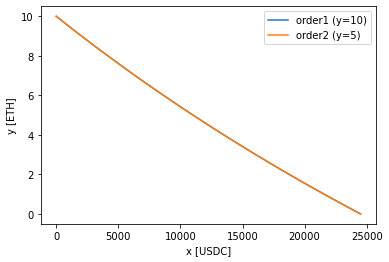

In [108]:
plt.plot([order1.xfromy_f(y) for y in ETHr], ETHr, label="order1 (y=10)")
plt.plot([order2.xfromy_f(y) for y in ETHr], ETHr, label="order2 (y=5)")
plt.ylabel("y [ETH]")
plt.xlabel("x [USDC]")
plt.legend()

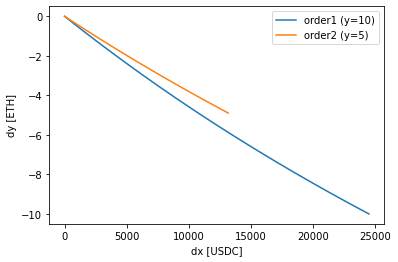

In [109]:
plt.plot([order1.dxfromdy_f(y, raiseonerror=False) for y in ETHr], -ETHr, label="order1 (y=10)")
plt.plot([order2.dxfromdy_f(y, raiseonerror=False) for y in ETHr], -ETHr, label="order2 (y=5)")
plt.ylabel("dy [ETH]")
plt.xlabel("dx [USDC]")
plt.legend()

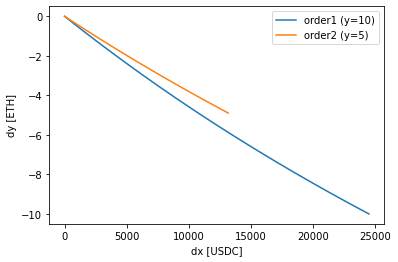

In [110]:
plt.plot([order1.dxfromdy_f(y, raiseonerror=False) for y in ETHr], -ETHr, label="order1 (y=10)")
plt.plot([order2.dxfromdy_f(y, raiseonerror=False) for y in ETHr], -ETHr, label="order2 (y=5)")
plt.ylabel("dy [ETH]")
plt.xlabel("dx [USDC]")
plt.legend()

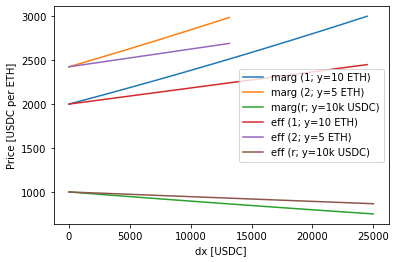

In [111]:
plt.plot(
    [order1.dxfromdy_f(dy, raiseonerror=False) for dy in ETHr], 
    [order1.p_marg_f(dy, raiseonerror=False) for dy in ETHr], 
    label="marg (1; y=10 ETH)")
plt.plot(
    [order2.dxfromdy_f(dy, raiseonerror=False) for dy in ETHr], 
    [order2.p_marg_f(dy, raiseonerror=False) for dy in ETHr], 
    label="marg (2; y=5 ETH)")
plt.plot(
    USDCr, 
    [orderr.p_marg_f(dy, raiseonerror=False) for dy in USDCr], 
    label="marg(r; y=10k USDC)")
plt.plot(
    [order1.dxfromdy_f(dy, raiseonerror=False) for dy in ETHr], 
    [order1.p_eff_f(dy, raiseonerror=False) for dy in ETHr], 
    label="eff (1; y=10 ETH)")
plt.plot(
    [order2.dxfromdy_f(dy, raiseonerror=False) for dy in ETHr], 
    [order2.p_eff_f(dy, raiseonerror=False) for dy in ETHr], 
    label="eff (2; y=5 ETH)")
plt.plot(
    USDCr, 
    [orderr.p_eff_f(dy, raiseonerror=False) for dy in USDCr], 
    label="eff (r; y=10k USDC)")
plt.ylabel("Price [USDC per ETH]")
plt.xlabel("dx [USDC]")
plt.legend(loc="center right")

## CarbonOrderUI tests goalseek

In [112]:
f = lambda x: sqrt(x)-3
print (round(CarbonOrderUI.goalseek(f,1,10), 6))
assert round(CarbonOrderUI.goalseek(f,1,10), 6) == 9

9.0


In [113]:
try:
    CarbonOrderUI.goalseek(f,10,1)
    raise RuntimeError("Should raise exception")
except ValueError as e:
    print(str(e))

('Bracketing value a must be smaller than b', 10, 1)


In [114]:
try:
    CarbonOrderUI.goalseek(f,10,20)
    raise RuntimeError("Should raise exception")
except ValueError as e:
    print(str(e))

('Sign of f(a) must be opposite of sign of f(b)', 0.16227766016837952, 1.4721359549995796, 10, 20)


## Example usage [NOTEST]

This section shows how to use yfromp-related functions for routing. This section does not create test code.

First we create a staggered list of 10 orders. Note that all those orders are only half-filled. The corresponding marginal prices are shown in the printout.

In [115]:
orders = [
    CarbonOrderUI.from_prices("ETH/USDC", "ETH", 2000+50*i, 2500+50*i, 10, 5)
    for i in range(10)
]
for o in orders:
    print(f"y={o.y} pa={round(o.px,0)} pb={round(o.py,0)} pmarg={round(o.p_marg,1)}")
margp = [o.p_marg for o in orders]
min(margp), max(margp)

y=5 pa=2500.0 pb=2000.0 pmarg=2229.1
y=5 pa=2550.0 pb=2050.0 pmarg=2279.6
y=5 pa=2600.0 pb=2100.0 pmarg=2330.0
y=5 pa=2650.0 pb=2150.0 pmarg=2380.4
y=5 pa=2700.0 pb=2200.0 pmarg=2430.8
y=5 pa=2750.0 pb=2250.0 pmarg=2481.2
y=5 pa=2800.0 pb=2300.0 pmarg=2531.6
y=5 pa=2850.0 pb=2350.0 pmarg=2581.9
y=5 pa=2900.0 pb=2400.0 pmarg=2632.3
y=5 pa=2950.0 pb=2450.0 pmarg=2682.6


(2229.1236000336485, 2682.6140015319056)

We are now looking at the dy released if we move to 2100. Spoiler: 0, because all positions are already beyond 2100.

In [116]:
[o.dyfromp_f(2100) for o in orders]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

If we go all the way to 3000 we see that all positions release their 5 ETH.

In [117]:
[o.dyfromp_f(3000) for o in orders]

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

For 2300 we see that the first two positions can still get us to 2300. They release 1.39 and 0.40 ETH respectively on the way to 2300

In [118]:
[o.dyfromp_f(2300) for o in orders]

[1.393236326565154, 0.40811287710152655, 0, 0, 0, 0, 0, 0, 0, 0]

For 2500, the first 6 positions release ETH

In [119]:
[o.dyfromp_f(2500) for o in orders]

[5.0,
 4.137019008909356,
 3.2427346404715647,
 2.3174854167487067,
 1.36159890190436,
 0.37539229489591897,
 0,
 0,
 0,
 0]

We define `dy_f` as the aggregate ETH released from all positions here

In [120]:
dy_f = lambda p: sum(o.dyfromp_f(p) for o in orders)

The corresponding USDC inflow can be computed thus

In [121]:
dx_f = lambda p: sum(o.dxfromdy_f(o.dyfromp_f(p)) for o in orders)

We can then plot the ETH release as a function of price

In [122]:
pvals = np.linspace(2000, 3000)
dyvals = [dy_f(p) for p in pvals]
dxvals = [dx_f(p) for p in pvals]

Text(0, 0.5, 'Aggregate ETH release')

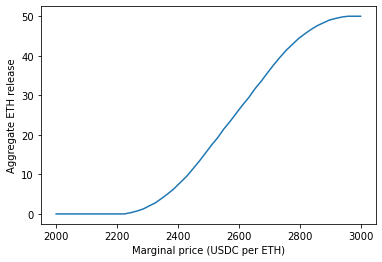

In [123]:
plt.plot(pvals, dyvals)
plt.xlabel("Marginal price (USDC per ETH)")
plt.ylabel("Aggregate ETH release")

Text(0, 0.5, 'Aggregate USDC inflow')

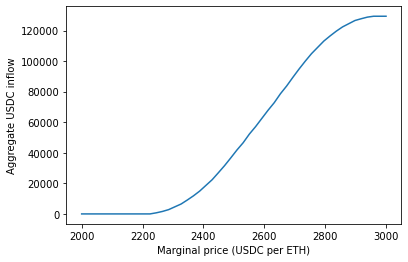

In [124]:
plt.plot(pvals, dxvals)
plt.xlabel("Marginal price (USDC per ETH)")
plt.ylabel("Aggregate USDC inflow")

Text(0, 0.5, 'Aggregate ETH release')

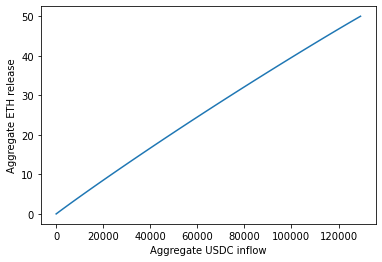

In [125]:
plt.plot(dxvals, dyvals)
plt.xlabel("Aggregate USDC inflow")
plt.ylabel("Aggregate ETH release")

Text(0, 0.5, 'Effective price (USDC per ETH)')

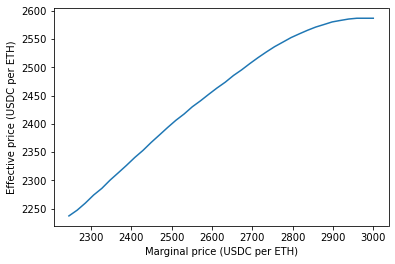

In [126]:
plt.plot(pvals, [dx/dy if dy>0 else None for dx,dy in zip(dxvals, dyvals)])
plt.xlabel("Marginal price (USDC per ETH)")
plt.ylabel("Effective price (USDC per ETH)")

Note for **Asaf**: this almost solves your "what is the price" problem if you plot it the other way round. The only issue is that here this is the marginal price after a move, so you'd have to integrate over it. We can also get the dx values the way we got the dy values (via the swap equation) but I do not have this implemented yet.

Text(0.5, 0, 'Aggregate ETH release')

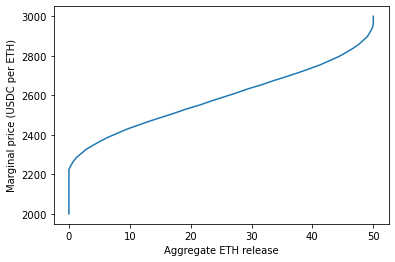

In [127]:
plt.plot(dyvals, pvals)
plt.ylabel("Marginal price (USDC per ETH)")
plt.xlabel("Aggregate ETH release")

Now this does solve your price question

Text(0, 0.5, 'Effective price (USDC per ETH)')

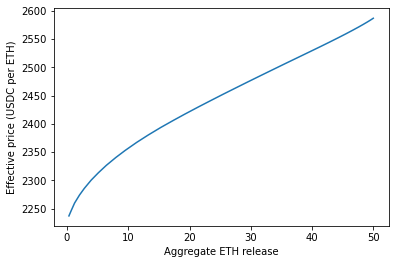

In [128]:
plt.plot(dyvals, [dx/dy if dy>0 else None for dx,dy in zip(dxvals, dyvals)])
plt.xlabel("Aggregate ETH release")
plt.ylabel("Effective price (USDC per ETH)")

Going back to the routing problem we want to solve is that we have an aggregate release, say `15`, and we want the price; this we can do with goalseek

In [129]:
p_goal = CarbonOrderUI.goalseek(lambda p: dy_f(p)-15, 2000, 3000)
p_goal

2487.0588779449463

The contribution of the positions at this price -- aka the **routing** -- is as follows

In [130]:
rl1 = [o.dyfromp_f(p_goal) for o in orders]
rl1

[4.779867109477664,
 3.909431354268376,
 3.007611565327439,
 2.074747101342123,
 1.1111663381843746,
 0.11718726278194591,
 0,
 0,
 0,
 0]

We can check that we routed indeed 15 ETH (the slight discrepancy is probably mostly related to goalseek precision)

In [131]:
sum([o.dyfromp_f(p_goal) for o in orders])

15.000010731381924

And finally we can verify this against the exact algo match

In [132]:
Sim = CarbonSimulatorUI(pair="ETH/USDC", verbose=False, raiseonerror=True)
Sim

CarbonSimulatorUI(<0 orders, 0 trades>, pair='ETH/USDC', mm='exact', xf=True)

In [133]:
for i in range(10):
    Sim.add_strategy('ETH', 10, 2000+50*i, 2500+50*i, None, None, None, None)
    # sell 5 ETH off each order to get the appropriate p_marg
    Sim.amm_sells('ETH', 5, use_positions=[i*2])
Sim.state()['orders'].query("disabled==False")

id     pair  tkn  y_int    y y_unit  disabled p_start   p_end  \
0    0  ETHUSDC  ETH   10.0  5.0    ETH     False  2000.0  2500.0   
2    2  ETHUSDC  ETH   10.0  5.0    ETH     False  2050.0  2550.0   
4    4  ETHUSDC  ETH   10.0  5.0    ETH     False  2100.0  2600.0   
6    6  ETHUSDC  ETH   10.0  5.0    ETH     False  2150.0  2650.0   
8    8  ETHUSDC  ETH   10.0  5.0    ETH     False  2200.0  2700.0   
10  10  ETHUSDC  ETH   10.0  5.0    ETH     False  2250.0  2750.0   
12  12  ETHUSDC  ETH   10.0  5.0    ETH     False  2300.0  2800.0   
14  14  ETHUSDC  ETH   10.0  5.0    ETH     False  2350.0  2850.0   
16  16  ETHUSDC  ETH   10.0  5.0    ETH     False  2400.0  2900.0   
18  18  ETHUSDC  ETH   10.0  5.0    ETH     False  2450.0  2950.0   

         p_marg        p_unit  lid  
0     2229.1236  USDC per ETH    1  
2   2279.579255  USDC per ETH    3  
4   2330.015407  USDC per ETH    5  
6   2380.433284  USDC per ETH    7  
8   2430.834014  USDC per ETH    9  
10  2481.218632  USDC per ETH   11  
12  2531.588093  USDC per ETH   13  
14  2581.943276  USDC per ETH   15  
16  2632.284995  USDC per ETH   17  
18  2682.614002  USDC per ETH   19

In [134]:
Sim.state()

{'orders':     id     pair   tkn         y_int             y y_unit  disabled p_start  \
 0    0  ETHUSDC   ETH     10.000000      5.000000    ETH     False  2000.0   
 1    1  ETHUSDC  USDC  10557.280900  10557.280900   USDC      True    None   
 2    2  ETHUSDC   ETH     10.000000      5.000000    ETH     False  2050.0   
 3    3  ETHUSDC  USDC  10808.720406  10808.720406   USDC      True    None   
 4    4  ETHUSDC   ETH     10.000000      5.000000    ETH     False  2100.0   
 5    5  ETHUSDC  USDC  11060.099857  11060.099857   USDC      True    None   
 6    6  ETHUSDC   ETH     10.000000      5.000000    ETH     False  2150.0   
 7    7  ETHUSDC  USDC  11311.422944  11311.422944   USDC      True    None   
 8    8  ETHUSDC   ETH     10.000000      5.000000    ETH     False  2200.0   
 9    9  ETHUSDC  USDC  11562.693059  11562.693059   USDC      True    None   
 10  10  ETHUSDC   ETH     10.000000      5.000000    ETH     False  2250.0   
 11  11  ETHUSDC  USDC  11813.913326  1181

In [135]:
r = Sim.amm_sells('ETH', 15)['trades']
r

uid  id subid                            note   aggr  exec limitfail  \
0  10.0  10     0                        route #0  False  True      None   
0  10.1  10     1                        route #2  False  True      None   
0  10.2  10     2                        route #4  False  True      None   
0  10.3  10     3                        route #6  False  True      None   
0  10.4  10     4                        route #8  False  True      None   
0  10.5  10     5                       route #10  False  True      None   
0    10  10     A  AMM sells 15ETH buys 35875USDC   True  True      None   

        amt1 tkn1          amt2  tkn2     pair              routeix  nroutes  \
0   4.779865  ETH  11254.488784  USDC  ETHUSDC                    0        1   
0   3.909430  ETH   9308.587288  USDC  ETHUSDC                    2        1   
0   3.007610  ETH   7240.089143  USDC  ETHUSDC                    4        1   
0   2.074745  ETH   5048.191466  USDC  ETHUSDC                    6        1   
0   1.111164  ETH   2732.115287  USDC  ETHUSDC                    8        1   
0   0.117185  ETH    291.104415  USDC  ETHUSDC                   10        1   
0  15.000000  ETH  35874.576383  USDC  ETHUSDC  [0, 2, 4, 6, 8, 10]        6   

         price        p_unit  
0  2391.638426  USDC per ETH  
0  2391.638426  USDC per ETH  
0  2391.638426  USDC per ETH  
0  2391.638426  USDC per ETH  
0  2391.638426  USDC per ETH  
0  2391.638426  USDC per ETH  
0  2391.638426  USDC per ETH

Below `rl2` is the route list obtained through routing, and `rl1` the original one. We see they are extremely close.

In [136]:
rl2 = list(r.query("aggr==False")["amt1"])
rl2

[4.779865462359,
 3.90942965137,
 3.007609806046,
 2.074745285081,
 1.111164464352,
 0.117185330793]

In [137]:
rl1[:len(rl2)]

[4.779867109477664,
 3.909431354268376,
 3.007611565327439,
 2.074747101342123,
 1.1111663381843746,
 0.11718726278194591]

In [138]:
[x2-x1 for x1,x2 in zip(rl1, rl2)]

[-1.6471186636835e-06,
 -1.7028983760880578e-06,
 -1.759281438751259e-06,
 -1.8162611228333958e-06,
 -1.8738323745992602e-06,
 -1.9319889459079587e-06]